In [30]:
# Libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

(800, 4)
(800,)
[0 1 1 1 0]


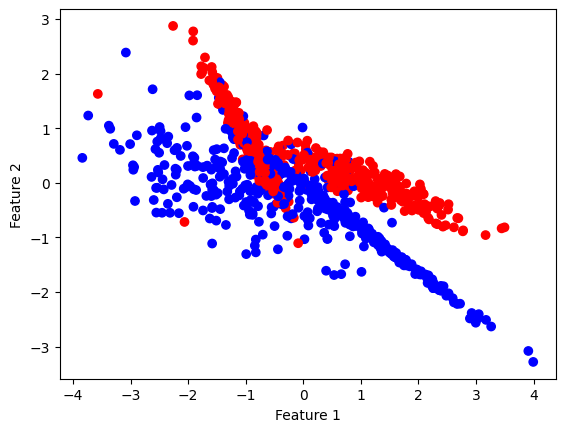

In [31]:
# Data Preparation
X, y = datasets.make_classification(
    n_samples=1000, n_features=4, n_classes=2, random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape)
print(y_train.shape)
print(y_train[:5])

colors = ['red', 'blue']
cmap = ListedColormap(colors)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.show()

In [32]:
class NaiveBayes:
    def _pdf(self, idx, x):
        mean = self._mean[idx]
        var = self._var[idx]

        # direct application of the probability distribution function formula
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def fit(self, X, y):
        samples_size, features_size = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # initialize mean, var, and prior for each class
        self._mean = np.zeros((n_classes, features_size), dtype=np.float64)
        self._var = np.zeros((n_classes, features_size), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        # calculate mean, var, prior for each class
        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(samples_size)
    
    def predict(self, X):
        return np.array([self._predict(x) for x in X])
    
    def _predict(self, x):
        posteriors = []

        # calculate posterior probabilities for each class
        for idx, _ in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior += prior
            posteriors.append(posterior)

        return self._classes[np.argmax(posteriors)]


In [33]:
# nb model
nb = NaiveBayes()

# returns accuracy of prediction
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

# fit and predict
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)

print("Naive Bayes classification acc:", accuracy(y_test, predictions))

Naive Bayes classification acc: 0.84
